This function has two distinct frequencies. 

In [1]:
f = x -> 3*cos(5*pi*x) - exp(2im*pi*x);

We set up to use the built-in `fft`. Note how the definition of the nodes has changed. 

In [2]:
n = 10;  N = 2n+1;
t = [ 2j/N for j=0:N-1 ]      # nodes in [0,2)
y = f.(t);

We perform Fourier analysis using `fft` and then examine the coefficients.

In [3]:
using FFTW
c = fft(y)/N

21-element Array{Complex{Float64},1}:
 -4.123685520036296e-16 - 1.0044874984703797e-16im
 -5.498247360048394e-16 - 1.9842029721797426e-16im
    -1.0000000000000002 - 8.706562339992313e-17im 
 -5.885791231251621e-16 - 1.755351086541556e-16im 
 -1.171043311406427e-16 + 4.012145121264691e-17im 
     1.4999999999999996 - 1.7818447470955614e-15im
  7.564730323504938e-16 - 5.2642401259614e-16im   
 4.2294210461910723e-16 + 4.503424429642884e-16im 
 -4.051605659606699e-17 - 5.331091682429137e-16im 
  6.156692766710495e-16 - 4.336373261824172e-16im 
 2.0818383974186774e-16 + 3.23049180503545e-16im  
  2.925765893638395e-16 - 2.340630606122975e-16im 
  5.435679850552667e-16 + 2.495113239811519e-16im 
 1.2667686283706214e-16 + 5.134387559233535e-16im 
  4.359147003539163e-16 - 4.895968511551833e-16im 
  8.181783306903294e-16 + 5.295676027554136e-16im 
     1.4999999999999993 + 1.6462732419952283e-15im
 -1.538118527030945e-16 - 1.5546273555983951e-16im
 -4.006733200881597e-16 + 2.34921665618154e-

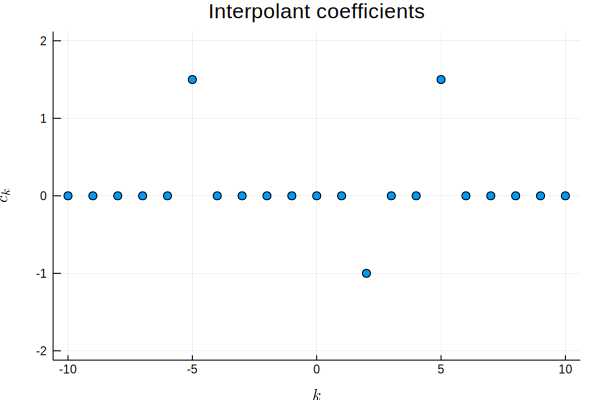

In [4]:
k = [0:n;-n:-1]    # frequency ordering 

using Plots
scatter(k,real(c),
    xaxis=("\$k\$",[-n,n]),yaxis=("\$c_k\$",[-2,2]), 
    title="Interpolant coefficients",leg=:none)

Note that $1.5 e^{5i\pi x}+1.5 e^{-5i\pi x} = 3 \cos(5\pi x)$ by Euler's formula, so this result is sensible.

Fourier's greatest contribution to mathematics was to point out that every periodic function is just a combination of frequencies---infinitely many of them in general, but truncated for computational use. 

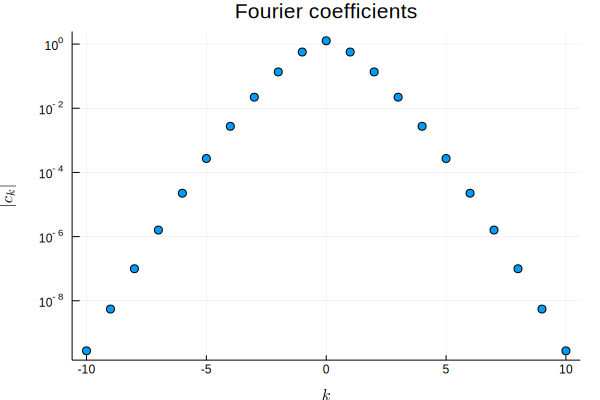

In [5]:
f = x -> exp( sin(pi*x) );
c = fft(f.(t))/N

scatter(k,abs.(c),
    xaxis=("\$k\$",[-n,n]),yaxis=("\$|c_k|\$",:log10), 
    title="Fourier coefficients",leg=:none)

The Fourier coefficients of smooth functions decay exponentially in magnitude as a function of the frequency. This decay rate is directly linked to the convergence of the interpolation error.